# webscraping data from cardekho.com 
updated up to 2023

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
url="https://www.cardekho.com"
headers={'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.1 Safari/605.1.15'}
cars_details=[]

In [ ]:
webpage=requests.get(url,headers=headers).text

In [ ]:
soup=BeautifulSoup(webpage,'lxml')

In [ ]:
brands=['Maruti','Hyundai','Tata','Honda','Mahindra','Toyota','Ford','Volkswagen','Renault','Nissan','Skoda','Fiat','BMW','Audi','Mercedes-Benz','Jaguar','Land_Rover','Volvo','Mitsubishi','Jeep']
brands_link=[]
for i in brands:
    brands_link.append(url+"/cars/"+i)
brands_link  

In [ ]:
cars_link=[]
for i in brands_link:
    r=requests.get(i,headers=headers).text
    soap1=BeautifulSoup(r,'lxml')
    temp=soap1.find_all('li',class_='gsc_col-xs-12 gsc_col-sm-6 gsc_col-md-12 gsc_col-lg-12')
    for i in temp:
       a_tag=i.find('a')
       if a_tag!=None:
          href=a_tag['href']
          cars_link.append(url+href)
print(cars_link)          

In [ ]:
for i in cars_link:
    r=requests.get(i+'/specs',headers=headers).text
    soap2=BeautifulSoup(r,'lxml')
    table_list=soap2.find_all('table',class_='keyfeature')
    if len(table_list)>1:
        car_info={}
        car_info["Brand"]=(soap2.find('div',class_='title').find('a').text)
        table_item=table_list[0].find_all('td')
        for info in range(0,len(table_item),2):
            car_info[table_item[info].text]=table_item[info+1].find('span').text
        table_item=table_list[1].find_all('td')
        for info in range(0,len(table_item),2):
            car_info[table_item[info].text]=table_item[info+1].find('span').text
        car_info["Price"]=(soap2.find('div',class_='price').find('span').text)    
        cars_details.append(car_info)

In [ ]:
df=pd.DataFrame(cars_details)
df.to_csv("..\Datasets\cars_details_dataset.csv")

-------------------------------------------------------------------------------------------------------------------------------------------------

# Data Cleaning And Feature Engineering

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df=pd.read_csv("..\Datasets\cars_details_dataset.csv")

In [76]:
df.head()

,Unnamed: 0,Brand,ARAI Mileage,Fuel Type,Engine Displacement (cc),No. of cylinder,Max Power (bhp@rpm),Max Torque (nm@rpm),Seating Capacity,TransmissionType,...,Service Cost (Avg. of 5 years),Ground Clearance Unladen,Engine Start Stop Button,Wheel Covers,Secondary Fuel Type,City Mileage,Charging time,Battery Capacity,Range,WLTP Mileage
0,0,Maruti Swift,22.56 kmpl,Petrol,1197.0,4.0,88.50bhp@6000rpm,113Nm@4400rpm,5,Automatic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Maruti FRONX,20.01 kmpl,Petrol,998.0,3.0,98.69bhp@5500rpm,147.6Nm@2000-4500rpm,5,Automatic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Maruti Brezza,19.8 kmpl,Petrol,1462.0,4.0,101.65bhp@6000rpm,136.8Nm@4400rpm,5,Automatic,...,"Rs.5,161",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Maruti Dzire,22.61 kmpl,Petrol,1197.0,4.0,88.50bhp@6000rpm,113Nm@4400rpm,5,Automatic,...,"Rs.5,254",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Maruti Jimny,16.39 kmpl,Petrol,1462.0,4.0,103.39bhp@6000rpm,134.2nm@4000rpm,4,Automatic,...,NaN,210mm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,133,134,135,136,137,138,139,140,141,142
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,133,134,135,136,137,138,139,140,141,142
Brand,Maruti Swift,Maruti FRONX,Maruti Brezza,Maruti Dzire,Maruti Jimny,Maruti Wagon R,Maruti Invicto,Maruti Alto K10,Maruti XL6,Maruti S-Presso,...,Volvo S90,Volvo XC40 Recharge,Mitsubishi Montero 2007-2012,Mitsubishi Montero 2009-2014,Mitsubishi Outlander 2007-2013,Mitsubishi Pajero 2002-2012,Jeep Compass,Jeep Wrangler,Jeep Meridian,Jeep Grand Cherokee
ARAI Mileage,22.56 kmpl,20.01 kmpl,19.8 kmpl,22.61 kmpl,16.39 kmpl,24.43 kmpl,23.24 kmpl,33.85 km/kg,20.27 kmpl,32.73 km/kg,...,NaN,NaN,11.56 kmpl,11.56 kmpl,11.3 kmpl,9.5 kmpl,14.9 kmpl,12.1 kmpl,NaN,NaN
Fuel Type,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,CNG,Petrol,CNG,...,Petrol,NaN,Diesel,Diesel,Petrol,Diesel,Diesel,Petrol,Diesel,Petrol
Engine Displacement (cc),1197.0,998.0,1462.0,1197.0,1462.0,1197.0,1987.0,998.0,1462.0,998.0,...,1969.0,NaN,3200.0,3200.0,2360.0,2835.0,1956.0,1998.0,1956.0,1995.0
No. of cylinder,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,...,4.0,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
Max Power (bhp@rpm),88.50bhp@6000rpm,98.69bhp@5500rpm,101.65bhp@6000rpm,88.50bhp@6000rpm,103.39bhp@6000rpm,88.50bhp@6000rpm,150.19bhp@6000rpm,55.92bhp@5300rpm,101.65bhp@6000rpm,55.92bhp@5500rpm,...,246.58bhp,408bhp,199.3bhp@3800rpm,199.3bhp@3800rpm,170PS @ 6000rpm,118.6@4000 (PS@rpm),167.67bhp@3750rpm,268bhp@5250rpm,172.35bhp@3750rpm,268.27bhp@5200rpm
Max Torque (nm@rpm),113Nm@4400rpm,147.6Nm@2000-4500rpm,136.8Nm@4400rpm,113Nm@4400rpm,134.2nm@4000rpm,113Nm@4400rpm,188Nm@4400-5200rpm,82.1Nm@3400rpm,136.8Nm@4400rpm,82.1Nm@3400rpm,...,350Nm,660Nm,441Nm@2000rpm,441Nm@2000rpm,226Nm @ 4100rpm,29.8@2000 (kgm@rpm),350Nm@1750-2500rpm,400Nm@3000rpm,350Nm@1750-2500rpm,400Nm@3000rpm
Seating Capacity,5,5,5,5,4,5,"7, 8","4, 5",6,"4, 5",...,5,5,7,7,5,6,5,5,7,5
TransmissionType,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Manual,Automatic,Manual,...,Automatic,NaN,Automatic,Automatic,Automatic,Manual,Automatic,Automatic,Automatic,Automatic


In [78]:
# dropping first colunm
df.drop("Unnamed: 0",axis=1,inplace=True)

In [79]:
df.isnull().sum()

Brand                               0
ARAI Mileage                       73
Fuel Type                          18
Engine Displacement (cc)           18
No. of cylinder                    18
Max Power (bhp@rpm)                 0
Max Torque (nm@rpm)                 0
Seating Capacity                    0
TransmissionType                   18
Boot Space (Litres)                87
Fuel Tank Capacity                 56
Body Type                           0
Power Steering                      6
Power Windows Front                 9
Anti Lock Braking System           12
Air Conditioner                    11
Driver Airbag                      10
Passenger Airbag                   12
Automatic Climate Control          83
Fog Lights - Front                 45
Alloy Wheels                       22
Price                               0
Multi-function Steering Wheel      58
Service Cost (Avg. of 5 years)    121
Ground Clearance Unladen          109
Engine Start Stop Button          117
Wheel Covers

In [80]:
df["ARAI Mileage"]

0      22.56 kmpl
1      20.01 kmpl
2       19.8 kmpl
3      22.61 kmpl
4      16.39 kmpl
          ...    
138      9.5 kmpl
139     14.9 kmpl
140     12.1 kmpl
141           NaN
142           NaN
Name: ARAI Mileage, Length: 143, dtype: object

In [81]:
# extract numerical value from "ARAI Mileage" and conver into numerical
df["ARAI Mileage"]=df["ARAI Mileage"].apply(lambda x: str(x).split(" ")[0] if x!=np.NaN else None)
df["ARAI Mileage"]=df["ARAI Mileage"].astype(float)

In [82]:
df['ARAI Mileage']

0      22.56
1      20.01
2      19.80
3      22.61
4      16.39
       ...  
138     9.50
139    14.90
140    12.10
141      NaN
142      NaN
Name: ARAI Mileage, Length: 143, dtype: float64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Brand                           143 non-null    object 
 1   ARAI Mileage                    70 non-null     float64
 2   Fuel Type                       125 non-null    object 
 3   Engine Displacement (cc)        125 non-null    float64
 4   No. of cylinder                 125 non-null    float64
 5   Max Power (bhp@rpm)             143 non-null    object 
 6   Max Torque (nm@rpm)             143 non-null    object 
 7   Seating Capacity                143 non-null    object 
 8   TransmissionType                125 non-null    object 
 9   Boot Space (Litres)             56 non-null     object 
 10  Fuel Tank Capacity              87 non-null     float64
 11  Body Type                       143 non-null    object 
 12  Power Steering                  137 

In [84]:
df.head(2)

,Brand,ARAI Mileage,Fuel Type,Engine Displacement (cc),No. of cylinder,Max Power (bhp@rpm),Max Torque (nm@rpm),Seating Capacity,TransmissionType,Boot Space (Litres),...,Service Cost (Avg. of 5 years),Ground Clearance Unladen,Engine Start Stop Button,Wheel Covers,Secondary Fuel Type,City Mileage,Charging time,Battery Capacity,Range,WLTP Mileage
0,Maruti Swift,22.56,Petrol,1197.0,4.0,88.50bhp@6000rpm,113Nm@4400rpm,5,Automatic,268,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maruti FRONX,20.01,Petrol,998.0,3.0,98.69bhp@5500rpm,147.6Nm@2000-4500rpm,5,Automatic,308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df['Max Power (bhp@rpm)']

0         88.50bhp@6000rpm
1         98.69bhp@5500rpm
2        101.65bhp@6000rpm
3         88.50bhp@6000rpm
4        103.39bhp@6000rpm
              ...         
138    118.6@4000 (PS@rpm)
139      167.67bhp@3750rpm
140         268bhp@5250rpm
141      172.35bhp@3750rpm
142      268.27bhp@5200rpm
Name: Max Power (bhp@rpm), Length: 143, dtype: object

In [86]:
# convert "(bhp@rpm)" or other units to kW for Max Power
def to_kW(x):
    if type(x)==float:
        return(x)
    number=''
    numbers=[]
    for i in x:
        if i.isdigit() or i=='.':
            number+=i
        else:
            if number !='':
                numbers.append(number)
            number=''
    if number !='':
        numbers.append(number)        
    if len(numbers)>1 and('bhp' in x or "Bhp" in x):
        return (float(numbers[0])*0.7457)
    else:
        return  float(numbers[0])  
df['Max Power (bhp@rpm)']=df['Max Power (bhp@rpm)'].apply(lambda x: to_kW(x))

In [87]:
df['Max Power (bhp@rpm)']

0       65.994450
1       73.593133
2       75.800405
3       65.994450
4       77.097923
          ...    
138    118.600000
139    125.031519
140    199.847600
141    128.521395
142    200.048939
Name: Max Power (bhp@rpm), Length: 143, dtype: float64

In [88]:
df.head()

,Brand,ARAI Mileage,Fuel Type,Engine Displacement (cc),No. of cylinder,Max Power (bhp@rpm),Max Torque (nm@rpm),Seating Capacity,TransmissionType,Boot Space (Litres),...,Service Cost (Avg. of 5 years),Ground Clearance Unladen,Engine Start Stop Button,Wheel Covers,Secondary Fuel Type,City Mileage,Charging time,Battery Capacity,Range,WLTP Mileage
0,Maruti Swift,22.56,Petrol,1197.0,4.0,65.994450,113Nm@4400rpm,5,Automatic,268,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maruti FRONX,20.01,Petrol,998.0,3.0,73.593133,147.6Nm@2000-4500rpm,5,Automatic,308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Maruti Brezza,19.80,Petrol,1462.0,4.0,75.800405,136.8Nm@4400rpm,5,Automatic,328,...,"Rs.5,161",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Maruti Dzire,22.61,Petrol,1197.0,4.0,65.994450,113Nm@4400rpm,5,Automatic,378,...,"Rs.5,254",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Maruti Jimny,16.39,Petrol,1462.0,4.0,77.097923,134.2nm@4000rpm,4,Automatic,211,...,NaN,210mm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df["Max Torque (nm@rpm)"]

0             113Nm@4400rpm
1      147.6Nm@2000-4500rpm
2           136.8Nm@4400rpm
3             113Nm@4400rpm
4           134.2nm@4000rpm
               ...         
138     29.8@2000 (kgm@rpm)
139      350Nm@1750-2500rpm
140           400Nm@3000rpm
141      350Nm@1750-2500rpm
142           400Nm@3000rpm
Name: Max Torque (nm@rpm), Length: 143, dtype: object

In [90]:
# convert Max Torque (nm@rpm) to only nm(float)
def to_nm(x):
    if type(x)==float:
        return x
    if "Nm" in x:
        return float(x.split("Nm")[0])
    elif "nm" in x:
        return float(x.split("nm")[0])
    else:
        return float(x.split('@')[0].strip())    
df["Max Torque (nm@rpm)"]=df["Max Torque (nm@rpm)"].apply(lambda x: to_nm(x))    

In [91]:
df["Max Torque (nm@rpm)"]

0      113.0
1      147.6
2      136.8
3      113.0
4      134.2
       ...  
138     29.8
139    350.0
140    400.0
141    350.0
142    400.0
Name: Max Torque (nm@rpm), Length: 143, dtype: float64

In [92]:
df.head(2)

,Brand,ARAI Mileage,Fuel Type,Engine Displacement (cc),No. of cylinder,Max Power (bhp@rpm),Max Torque (nm@rpm),Seating Capacity,TransmissionType,Boot Space (Litres),...,Service Cost (Avg. of 5 years),Ground Clearance Unladen,Engine Start Stop Button,Wheel Covers,Secondary Fuel Type,City Mileage,Charging time,Battery Capacity,Range,WLTP Mileage
0,Maruti Swift,22.56,Petrol,1197.0,4.0,65.994450,113.0,5,Automatic,268,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maruti FRONX,20.01,Petrol,998.0,3.0,73.593133,147.6,5,Automatic,308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
# change data type of seat capacity from object to int and replace pair to single int
def single_int(x):
    if len(x)==1:
        return int(x)
    else:
        l=x.split(",")
        total=sum(int(i.strip()) for i in l)
        return int(total / len(l))
df["Seating Capacity"]=df["Seating Capacity"].apply(single_int)

In [95]:
df["Seating Capacity"].unique()

array([5, 4, 7, 6, 2, 3], dtype=int64)

In [96]:
df["TransmissionType"].unique()

array(['Automatic', 'Manual', nan], dtype=object)

In [97]:
df["Boot Space (Litres)"].isnull().sum()

87

In [98]:
# droping "Boot Space (Litres)"
df.drop("Boot Space (Litres)" ,axis=1,inplace=True)

In [99]:
df["Body Type"].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Minivan', 'Pickup Truck',
       'Convertible', 'Coupe'], dtype=object)

In [100]:
df["Ground Clearance Unladen"].isnull().sum()

109

In [101]:
# convert "Ground Clearance Unladen" to clean float value
def to_float(x):
    if type(x)==float:
        return x
    if "m" not in x:
        return float(x)
    else:
        return float(x[:-2])    
df["Ground Clearance Unladen"]=df["Ground Clearance Unladen"].apply(to_float)

In [102]:
# fill the missing values in the "Ground Clearance Unladen" column using the mean values calculated for each unique "Body Type"
body_type_group=df.groupby("Body Type")
temp_dict={}
for i in df["Body Type"].unique():
    temp_dict[i]=body_type_group.get_group(i)["Ground Clearance Unladen"].mean()
    
for i in range(len(df)):
    if pd.isna(df.loc[i,"Ground Clearance Unladen"]):
        df.loc[i,"Ground Clearance Unladen"]=temp_dict[df.loc[i,"Body Type"]]    

In [103]:
df["Ground Clearance Unladen"].fillna(df["Ground Clearance Unladen"].mean(),inplace=True)

In [104]:
df["Ground Clearance Unladen"].isnull().sum()

0

In [105]:
df.isnull().sum()

Brand                               0
ARAI Mileage                       73
Fuel Type                          18
Engine Displacement (cc)           18
No. of cylinder                    18
Max Power (bhp@rpm)                 0
Max Torque (nm@rpm)                 0
Seating Capacity                    0
TransmissionType                   18
Fuel Tank Capacity                 56
Body Type                           0
Power Steering                      6
Power Windows Front                 9
Anti Lock Braking System           12
Air Conditioner                    11
Driver Airbag                      10
Passenger Airbag                   12
Automatic Climate Control          83
Fog Lights - Front                 45
Alloy Wheels                       22
Price                               0
Multi-function Steering Wheel      58
Service Cost (Avg. of 5 years)    121
Ground Clearance Unladen            0
Engine Start Stop Button          117
Wheel Covers                      127
Secondary Fu

In [106]:
# drop columns having 100+ nan values
df.drop(['Multi-function Steering Wheel', 'Service Cost (Avg. of 5 years)',
       'Wheel Covers', 'Secondary Fuel Type', 'City Mileage',
       'Engine Start Stop Button', 'Charging time', 'Battery Capacity',
       'Range','WLTP Mileage'],axis=1,inplace=True)

In [107]:
df.columns

Index(['Brand', 'ARAI Mileage', 'Fuel Type', 'Engine Displacement (cc)',
       'No. of cylinder', 'Max Power (bhp@rpm)', 'Max Torque (nm@rpm)',
       'Seating Capacity', 'TransmissionType', 'Fuel Tank Capacity',
       'Body Type', 'Power Steering', 'Power Windows Front',
       'Anti Lock Braking System', 'Air Conditioner', 'Driver Airbag',
       'Passenger Airbag', 'Automatic Climate Control', 'Fog Lights - Front',
       'Alloy Wheels', 'Price', 'Ground Clearance Unladen'],
      dtype='object')

In [108]:
# fill the boolioan feature nan value to NO
df[['Power Steering','Power Windows Front', 'Anti Lock Braking System', 'Air Conditioner','Driver Airbag', 'Passenger Airbag', 'Automatic Climate Control','Fog Lights - Front', 'Alloy Wheels']]=df[['Power Steering','Power Windows Front', 'Anti Lock Braking System', 'Air Conditioner','Driver Airbag', 'Passenger Airbag', 'Automatic Climate Control','Fog Lights - Front', 'Alloy Wheels']].fillna('No')

In [109]:
df.isnull().sum()

Brand                         0
ARAI Mileage                 73
Fuel Type                    18
Engine Displacement (cc)     18
No. of cylinder              18
Max Power (bhp@rpm)           0
Max Torque (nm@rpm)           0
Seating Capacity              0
TransmissionType             18
Fuel Tank Capacity           56
Body Type                     0
Power Steering                0
Power Windows Front           0
Anti Lock Braking System      0
Air Conditioner               0
Driver Airbag                 0
Passenger Airbag              0
Automatic Climate Control     0
Fog Lights - Front            0
Alloy Wheels                  0
Price                         0
Ground Clearance Unladen      0
dtype: int64

In [110]:
# map boolian value to 0 and 1
temp_list=['Power Steering','Power Windows Front', 'Anti Lock Braking System', 'Air Conditioner','Driver Airbag', 'Passenger Airbag', 'Automatic Climate Control','Fog Lights - Front', 'Alloy Wheels']
for i in temp_list:
    df[i]=df[i].map({"Yes":1,"No":0})

In [111]:
df["Price"].head()

0      Rs.5.99 - 9.03 Lakh*Get On Road Price
1     Rs.7.46 - 13.13 Lakh*Get On Road Price
2     Rs.8.29 - 14.14 Lakh*Get On Road Price
3      Rs.6.51 - 9.39 Lakh*Get On Road Price
4    Rs.12.74 - 15.05 Lakh*Get On Road Price
Name: Price, dtype: object

In [112]:
# convert price undeciplined manner into decipline manner
def to_single_lakh(x):
    x=x[3:]
    number=''
    numbers=[]
    for i in x:
        if i.isdigit() or i=='.':
            number+=i
        else:
            if number!="":
                numbers.append(number)
                number=''
    if number!="":
        numbers.append(number)
    if 'Cr' in x and len(numbers)==1:
        return float(numbers[0])*10000000
    elif 'Cr' in x and len(numbers)>1:
        return (sum(float(i) for i in numbers)/len(numbers))*10000000
    elif 'Lakh' in x and len(numbers)==1:
        return float(numbers[0])*100000
    else:
        return (sum(float(i) for i in numbers)/len(numbers))*100000

df['Price']=df["Price"].apply(to_single_lakh)

In [113]:
df["Price"]

0       751000.0
1      1029500.0
2      1121500.0
3       795000.0
4      1389500.0
         ...    
138    2040500.0
139    2690000.0
140    6265000.0
141    3600500.0
142    8050000.0
Name: Price, Length: 143, dtype: float64

In [37]:
df.columns[df.dtypes==object]

Index(['Brand', 'Fuel Type', 'TransmissionType', 'Body Type'], dtype='object')

In [38]:
df['Brand'].unique()

array(['Maruti Swift', 'Maruti FRONX', 'Maruti Brezza', 'Maruti Dzire',
       'Maruti Jimny', 'Maruti Wagon R', 'Maruti Invicto',
       'Maruti Alto K10', 'Maruti XL6', 'Maruti S-Presso',
       'Maruti Ertiga Tour', 'Maruti Alto 800 tour', 'Maruti Eeco Cargo',
       'Maruti Swift Dzire Tour', 'Maruti Wagon R tour', 'Hyundai Exter',
       'Hyundai Creta', 'Hyundai Verna', 'Hyundai Venue', 'Hyundai Aura',
       'Hyundai Alcazar', 'Hyundai Tucson', 'Hyundai Kona Electric',
       'Hyundai Venue N Line', 'Hyundai Grand i10 Nios',
       'Hyundai i20 N Line', 'Hyundai IONIQ 5', 'Tata Punch',
       'Tata Nexon', 'Tata Harrier', 'Tata Altroz', 'Tata Tiago EV',
       'Tata Tigor', 'Tata Tigor EV', 'Tata Nexon EV Max',
       'Tata Tiago NRG', 'Tata Yodha Pickup', 'Tata Nexon EV Prime',
       'Honda City', 'Honda Amaze', 'Honda City Hybrid', 'Mahindra Thar',
       'Mahindra XUV700', 'Mahindra Bolero', 'Mahindra Scorpio N',
       'Mahindra XUV300', 'Mahindra Scorpio Classic',
       '

In [39]:
df['Brand']=df['Brand'].apply(lambda x: x.split(" ")[0])

In [40]:
df["Brand"].unique()

array(['Maruti', 'Hyundai', 'Tata', 'Honda', 'Mahindra', 'Toyota', 'Ford',
       'Volkswagen', 'Renault', 'Nissan', 'Skoda', 'Fiat', 'BMW', 'Audi',
       'Mercedes-Benz', 'Jaguar', 'Land', 'Volvo', 'Mitsubishi', 'Jeep'],
      dtype=object)

In [41]:
df["Fuel Type"].unique()

array(['Petrol', 'CNG', 'Diesel', nan], dtype=object)

In [42]:
df["Fuel Type"].value_counts()

Fuel Type
Petrol    73
Diesel    42
CNG       10
Name: count, dtype: int64

In [43]:
# fill nan value of fuel type with petrol beacause it has high frequency  
df["Fuel Type"].fillna("Petrol",inplace=True)

In [44]:
df["TransmissionType"].value_counts()

TransmissionType
Automatic    100
Manual        25
Name: count, dtype: int64

In [45]:
# fill nan value of TransmissionType with Automatic beacause it has high frequency
df["TransmissionType"].fillna("Automatic",inplace=True)

In [46]:
#fill nan value of df["Fuel Tank Capacity"] with its mean
df["Fuel Tank Capacity"].fillna(df["Fuel Tank Capacity"].mean(),inplace=True)

In [47]:
#fill nan value of df["No. of cylinder"] with its mean
df["No. of cylinder"].fillna(df["No. of cylinder"].mean(),inplace=True)

In [48]:
#fill nan value of df["Engine Displacement (cc)"] with its mean
df["Engine Displacement (cc)"].fillna(df["Engine Displacement (cc)"].mean(),inplace=True)

In [49]:
#fill nan value of df["ARAI Mileage"] with its mean
df["ARAI Mileage"].fillna(df["ARAI Mileage"].mean(),inplace=True)

In [50]:
#fill nan value of df["Max Power (bhp@rpm)"] with its mean
df["Max Power (bhp@rpm)"].fillna(df["Max Power (bhp@rpm)"].mean(),inplace=True)

In [51]:
#fill nan value of df["Max Torque (nm@rpm)"] with its mean
df["Max Torque (nm@rpm)"].fillna(df["Max Torque (nm@rpm)"].mean(),inplace=True)

In [52]:
df.isnull().sum()

Brand                        0
ARAI Mileage                 0
Fuel Type                    0
Engine Displacement (cc)     0
No. of cylinder              0
Max Power (bhp@rpm)          0
Max Torque (nm@rpm)          0
Seating Capacity             0
TransmissionType             0
Fuel Tank Capacity           0
Body Type                    0
Power Steering               0
Power Windows Front          0
Anti Lock Braking System     0
Air Conditioner              0
Driver Airbag                0
Passenger Airbag             0
Automatic Climate Control    0
Fog Lights - Front           0
Alloy Wheels                 0
Price                        0
Ground Clearance Unladen     0
dtype: int64

In [53]:
df.rename(columns={"Max Power (bhp@rpm)":"Max Power (kW)",
                  "Max Torque (nm@rpm)":"Max Torque (Nm)"},inplace=True)

In [54]:
df.head()

,Brand,ARAI Mileage,Fuel Type,Engine Displacement (cc),No. of cylinder,Max Power (kW),Max Torque (Nm),Seating Capacity,TransmissionType,Fuel Tank Capacity,...,Power Windows Front,Anti Lock Braking System,Air Conditioner,Driver Airbag,Passenger Airbag,Automatic Climate Control,Fog Lights - Front,Alloy Wheels,Price,Ground Clearance Unladen
0,Maruti,22.56,Petrol,1197.0,4.0,65.994450,113.0,5,Automatic,37.0,...,1,1,1,1,1,1,1,1,751000.0,689.200000
1,Maruti,20.01,Petrol,998.0,3.0,73.593133,147.6,5,Automatic,37.0,...,1,1,1,1,1,1,0,1,1029500.0,204.095238
2,Maruti,19.80,Petrol,1462.0,4.0,75.800405,136.8,5,Automatic,48.0,...,1,1,1,1,1,1,1,1,1121500.0,204.095238
3,Maruti,22.61,Petrol,1197.0,4.0,65.994450,113.0,5,Automatic,37.0,...,1,1,1,1,1,1,1,1,795000.0,174.250000
4,Maruti,16.39,Petrol,1462.0,4.0,77.097923,134.2,4,Automatic,40.0,...,1,1,1,1,1,1,1,1,1389500.0,210.000000


In [55]:
df.columns[df.dtypes==object]

Index(['Brand', 'Fuel Type', 'TransmissionType', 'Body Type'], dtype='object')

In [56]:
df.columns

Index(['Brand', 'ARAI Mileage', 'Fuel Type', 'Engine Displacement (cc)',
       'No. of cylinder', 'Max Power (kW)', 'Max Torque (Nm)',
       'Seating Capacity', 'TransmissionType', 'Fuel Tank Capacity',
       'Body Type', 'Power Steering', 'Power Windows Front',
       'Anti Lock Braking System', 'Air Conditioner', 'Driver Airbag',
       'Passenger Airbag', 'Automatic Climate Control', 'Fog Lights - Front',
       'Alloy Wheels', 'Price', 'Ground Clearance Unladen'],
      dtype='object')

In [57]:
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [58]:
ct=ColumnTransformer(
  transformers=[("trans1",OneHotEncoder(),['Brand']),
                ("trans2",OneHotEncoder(),['Fuel Type']),
                ("trans3",OneHotEncoder(),['TransmissionType']),
                ("trans4",OneHotEncoder(),["Body Type"])],
  remainder="passthrough")

In [59]:
data=pd.DataFrame(ct.fit_transform(df),columns=ct.get_feature_names_out())
list=data.columns.to_series()
data.columns=list.apply(lambda x: x.split('__')[-1])

In [60]:
data.columns

Index(['Brand_Audi', 'Brand_BMW', 'Brand_Fiat', 'Brand_Ford', 'Brand_Honda',
       'Brand_Hyundai', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Land',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Renault', 'Brand_Skoda',
       'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo',
       'Fuel Type_CNG', 'Fuel Type_Diesel', 'Fuel Type_Petrol',
       'TransmissionType_Automatic', 'TransmissionType_Manual',
       'Body Type_Convertible', 'Body Type_Coupe', 'Body Type_Hatchback',
       'Body Type_MUV', 'Body Type_Minivan', 'Body Type_Pickup Truck',
       'Body Type_SUV', 'Body Type_Sedan', 'ARAI Mileage',
       'Engine Displacement (cc)', 'No. of cylinder', 'Max Power (kW)',
       'Max Torque (Nm)', 'Seating Capacity', 'Fuel Tank Capacity',
       'Power Steering', 'Power Windows Front', 'Anti Lock Braking System',
       'Air Conditioner', 'Driver Airbag', 'Passenger Airbag',
       'Automatic Climate Control

In [61]:
df=data

In [62]:
for i in df.columns:
    df[i]=df[i].astype(float)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand_Audi                  143 non-null    float64
 1   Brand_BMW                   143 non-null    float64
 2   Brand_Fiat                  143 non-null    float64
 3   Brand_Ford                  143 non-null    float64
 4   Brand_Honda                 143 non-null    float64
 5   Brand_Hyundai               143 non-null    float64
 6   Brand_Jaguar                143 non-null    float64
 7   Brand_Jeep                  143 non-null    float64
 8   Brand_Land                  143 non-null    float64
 9   Brand_Mahindra              143 non-null    float64
 10  Brand_Maruti                143 non-null    float64
 11  Brand_Mercedes-Benz         143 non-null    float64
 12  Brand_Mitsubishi            143 non-null    float64
 13  Brand_Nissan                143 non

In [64]:
df.describe()

,Brand_Audi,Brand_BMW,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jaguar,Brand_Jeep,Brand_Land,Brand_Mahindra,...,Power Windows Front,Anti Lock Braking System,Air Conditioner,Driver Airbag,Passenger Airbag,Automatic Climate Control,Fog Lights - Front,Alloy Wheels,Price,Ground Clearance Unladen
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,1.430000e+02,143.000000
mean,0.083916,0.118881,0.006993,0.020979,0.020979,0.083916,0.020979,0.027972,0.027972,0.097902,...,0.937063,0.902098,0.923077,0.916084,0.895105,0.384615,0.671329,0.839161,1.941276e+07,245.018530
std,0.278236,0.324786,0.083624,0.143818,0.143818,0.278236,0.143818,0.165472,0.165472,0.298227,...,0.243703,0.298227,0.267406,0.278236,0.307495,0.488214,0.471381,0.368674,7.867821e+07,250.073291
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.200000e+05,100.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.105000e+06,174.250000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.415000e+06,204.095238
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.425000e+06,204.095238
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.075500e+08,2729.000000


<Axes: >

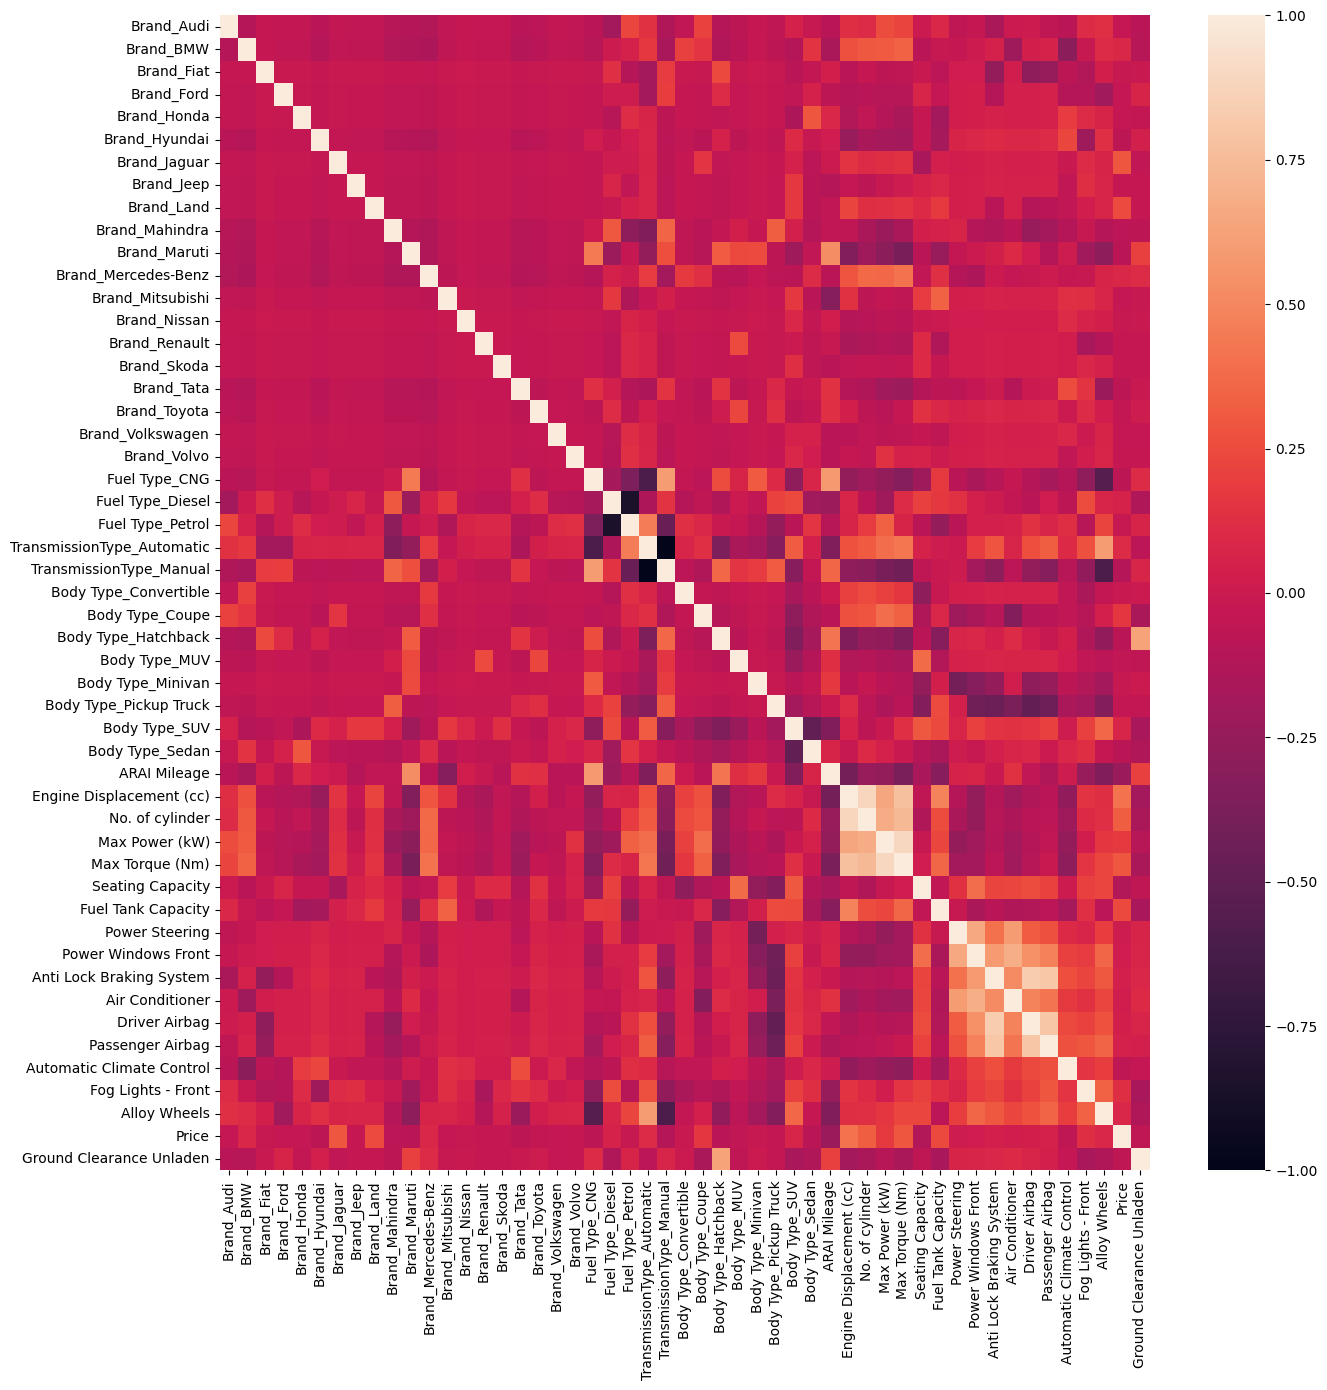

In [65]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

In [66]:
df.corr()["Price"]

Brand_Audi                   -0.031488
Brand_BMW                     0.092124
Brand_Fiat                   -0.019892
Brand_Ford                   -0.033273
Brand_Honda                  -0.033644
Brand_Hyundai                -0.068284
Brand_Jaguar                  0.292046
Brand_Jeep                   -0.030857
Brand_Land                    0.243905
Brand_Mahindra               -0.076306
Brand_Maruti                 -0.080665
Brand_Mercedes-Benz           0.088027
Brand_Mitsubishi             -0.035346
Brand_Nissan                 -0.019868
Brand_Renault                -0.028235
Brand_Skoda                  -0.025246
Brand_Tata                   -0.067216
Brand_Toyota                 -0.044487
Brand_Volkswagen             -0.032148
Brand_Volvo                  -0.027414
Fuel Type_CNG                -0.065458
Fuel Type_Diesel              0.060891
Fuel Type_Petrol             -0.022950
TransmissionType_Automatic    0.108499
TransmissionType_Manual      -0.108499
Body Type_Convertible    

In [67]:
df.drop(["Fuel Type_CNG","TransmissionType_Automatic","Body Type_MUV","Brand_Jeep"],axis=1,inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand_Audi                 143 non-null    float64
 1   Brand_BMW                  143 non-null    float64
 2   Brand_Fiat                 143 non-null    float64
 3   Brand_Ford                 143 non-null    float64
 4   Brand_Honda                143 non-null    float64
 5   Brand_Hyundai              143 non-null    float64
 6   Brand_Jaguar               143 non-null    float64
 7   Brand_Land                 143 non-null    float64
 8   Brand_Mahindra             143 non-null    float64
 9   Brand_Maruti               143 non-null    float64
 10  Brand_Mercedes-Benz        143 non-null    float64
 11  Brand_Mitsubishi           143 non-null    float64
 12  Brand_Nissan               143 non-null    float64
 13  Brand_Renault              143 non-null    float64

<Axes: >

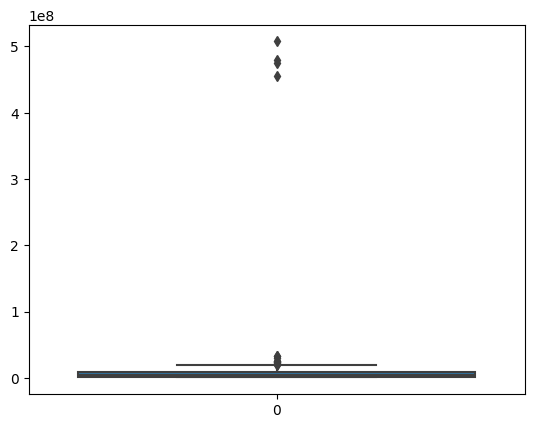

In [69]:
sns.boxplot(data=df["Price"])

In [70]:
# remove outliers 2 times
q1,q3=df["Price"].quantile([0.25,0.75])
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
df.drop(df[df["Price"].between(lower_limit,upper_limit)==False].index,inplace=True)
q1,q3=df["Price"].quantile([0.25,0.75])
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
df.drop(df[df["Price"].between(lower_limit,upper_limit)==False].index,inplace=True)

<Axes: >

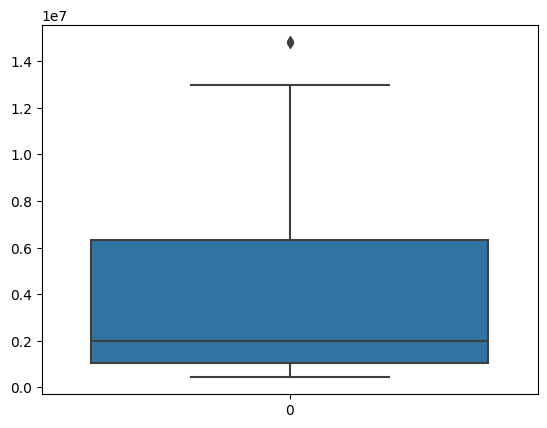

In [71]:
sns.boxplot(data=df["Price"])

In [72]:
df.reset_index(drop=True)

,Brand_Audi,Brand_BMW,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jaguar,Brand_Land,Brand_Mahindra,Brand_Maruti,...,Power Windows Front,Anti Lock Braking System,Air Conditioner,Driver Airbag,Passenger Airbag,Automatic Climate Control,Fog Lights - Front,Alloy Wheels,Price,Ground Clearance Unladen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,751000.0,689.200000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1029500.0,204.095238
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1121500.0,204.095238
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,795000.0,174.250000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1389500.0,210.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,2040500.0,190.000000
118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,2690000.0,204.095238
119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,6265000.0,217.000000
120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,3600500.0,204.095238


In [ ]:
df.to_csv("..\Datasets\final_data_ set_of_car.csv")

---------------------------------------------------

# Model Building

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [15]:
df=pd.read_csv(r"..\Datasets\final_data_ set_of_car.csv")

In [16]:
df.head(2)

,Unnamed: 0,Brand_Audi,Brand_BMW,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jaguar,Brand_Land,Brand_Mahindra,...,Power Windows Front,Anti Lock Braking System,Air Conditioner,Driver Airbag,Passenger Airbag,Automatic Climate Control,Fog Lights - Front,Alloy Wheels,Price,Ground Clearance Unladen
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,751000.0,689.200000
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1029500.0,204.095238


In [17]:
df.drop(df.columns[0],axis=1,inplace=True)

In [18]:
df.columns

Index(['Brand_Audi', 'Brand_BMW', 'Brand_Fiat', 'Brand_Ford', 'Brand_Honda',
       'Brand_Hyundai', 'Brand_Jaguar', 'Brand_Land', 'Brand_Mahindra',
       'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mitsubishi',
       'Brand_Nissan', 'Brand_Renault', 'Brand_Skoda', 'Brand_Tata',
       'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo', 'Fuel Type_Diesel',
       'Fuel Type_Petrol', 'TransmissionType_Manual', 'Body Type_Convertible',
       'Body Type_Coupe', 'Body Type_Hatchback', 'Body Type_Minivan',
       'Body Type_Pickup Truck', 'Body Type_SUV', 'Body Type_Sedan',
       'ARAI Mileage', 'Engine Displacement (cc)', 'No. of cylinder',
       'Max Power (kW)', 'Max Torque (Nm)', 'Seating Capacity',
       'Fuel Tank Capacity', 'Power Steering', 'Power Windows Front',
       'Anti Lock Braking System', 'Air Conditioner', 'Driver Airbag',
       'Passenger Airbag', 'Automatic Climate Control', 'Fog Lights - Front',
       'Alloy Wheels', 'Price', 'Ground Clearance Unladen'],
      

In [19]:
X=df.drop("Price",axis=1)
Y=df["Price"]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

scalling

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# simple liner regression

In [23]:
from sklearn.linear_model import LinearRegression
regressor1=LinearRegression()
regressor1.fit(X_train,Y_train)
Y_predict=regressor1.predict(X_test)
print(mean_absolute_error(Y_test,Y_predict))
print(r2_score(Y_test,Y_predict))

1336649.675217335
0.7280975314162299


# lasso regularisation

In [24]:
from sklearn.linear_model import Lasso
regressor2=Lasso()
regressor2.fit(X_train,Y_train)
Y_predict=regressor2.predict(X_test)
print(mean_absolute_error(Y_test,Y_predict))
print(r2_score(Y_test,Y_predict))

1336617.4062820626
0.7281106643490327


# Ridge regularisation

In [25]:
from sklearn.linear_model import Ridge
regressor3=Ridge()
regressor3.fit(X_train,Y_train)
Y_predict=regressor3.predict(X_test)
print(mean_absolute_error(Y_test,Y_predict))
print(r2_score(Y_test,Y_predict))

1198229.1040708895
0.7876597592255032


# Elastic net regression

In [26]:
from sklearn.linear_model import ElasticNet
regressor4=ElasticNet()
regressor4.fit(X_train,Y_train)
Y_predict=regressor4.predict(X_test)
print(mean_absolute_error(Y_test,Y_predict))
print(r2_score(Y_test,Y_predict))

958125.6075627544
0.8642392179025263


# DEEP LEARNING MODEL

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense 
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from keras.regularizers import l2
import keras_tuner as kt
from keras.optimizers import Adam, SGD, RMSprop, Adadelta

In [6]:
df=pd.read_csv(r"..\Datasets\final_data_ set_of_car.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,Brand_Audi,Brand_BMW,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jaguar,Brand_Land,Brand_Mahindra,Brand_Maruti,...,Power Windows Front,Anti Lock Braking System,Air Conditioner,Driver Airbag,Passenger Airbag,Automatic Climate Control,Fog Lights - Front,Alloy Wheels,Price,Ground Clearance Unladen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,751000.0,689.200000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1029500.0,204.095238
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1121500.0,204.095238
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,795000.0,174.250000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1389500.0,210.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,2040500.0,190.000000
118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,2690000.0,204.095238
119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,6265000.0,217.000000
120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,3600500.0,204.095238


In [7]:
from sklearn.model_selection import train_test_split
X=df.drop("Price",axis=1)
Y=df['Price']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)


In [9]:
def build_model(hp):
    optimizer_choice = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop', 'adadelta'])
    model = Sequential()

    # Input layer
    model.add(Dense(
        units=hp.Int('units_0', min_value=1, max_value=100, step=1),
        activation=hp.Choice('activation_0', ['linear', 'relu']),
        kernel_regularizer=l2(hp.Choice('alpha_0', [0.01, 0.1, 1.0])),
        input_dim=46
    ))

    # Hidden layers
    for i in range(1, hp.Int('num_layers', min_value=1, max_value=10)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=1, max_value=100, step=1),
            activation=hp.Choice(f'activation_{i}', ['linear', 'relu']),
            kernel_regularizer=l2(hp.Choice(f'alpha_{i}', [0.01, 0.1, 1.0]))
        ))

    # Output layer
    model.add(Dense(1, activation='linear'))

    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4]))
    elif optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4]))
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4]))
    else:
        optimizer = Adadelta(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4]))

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=["mae"])
    
    return model

r2_score_objective = kt.Objective("mae", direction="min")

tuner = kt.RandomSearch(build_model, objective=r2_score_objective, max_trials=50)

tuner.search(X_train, Y_train, epochs=5,validation_data=(X_test,Y_test))


Trial 50 Complete [00h 00m 02s]
mae: 4072526.0

Best mae So Far: 2323866.75
Total elapsed time: 00h 01m 28s


In [10]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop',
 'units_0': 15,
 'activation_0': 'linear',
 'alpha_0': 0.1,
 'num_layers': 7,
 'learning_rate': 0.01,
 'units_1': 11,
 'activation_1': 'linear',
 'alpha_1': 0.1,
 'units_2': 33,
 'activation_2': 'relu',
 'alpha_2': 0.01,
 'units_3': 51,
 'activation_3': 'linear',
 'alpha_3': 1.0,
 'units_4': 35,
 'activation_4': 'relu',
 'alpha_4': 0.01,
 'units_5': 73,
 'activation_5': 'linear',
 'alpha_5': 0.1,
 'units_6': 15,
 'activation_6': 'relu',
 'alpha_6': 0.01,
 'units_7': 58,
 'activation_7': 'relu',
 'alpha_7': 0.1,
 'units_8': 93,
 'activation_8': 'relu',
 'alpha_8': 0.01,
 'units_9': 87,
 'activation_9': 'linear',
 'alpha_9': 1.0}

In [11]:
model=tuner.get_best_models(num_models=1)[0]

In [12]:
model.fit(X_train, Y_train, epochs=450,initial_epoch=6)

Epoch 7/450
3/3 [==============================] - 1s 5ms/step - loss: 7559008223232.0000 - mae: 2350539.7500
Epoch 8/450
3/3 [==============================] - 0s 6ms/step - loss: 10237429940224.0000 - mae: 2560597.7500
Epoch 9/450
3/3 [==============================] - 0s 4ms/step - loss: 9459942293504.0000 - mae: 2302815.5000
Epoch 10/450
3/3 [==============================] - 0s 5ms/step - loss: 7989263073280.0000 - mae: 2246087.2500
Epoch 11/450
3/3 [==============================] - 0s 4ms/step - loss: 10822804832256.0000 - mae: 2786381.2500
Epoch 12/450
3/3 [==============================] - 0s 6ms/step - loss: 8997690146816.0000 - mae: 2296662.5000
Epoch 13/450
3/3 [==============================] - 0s 5ms/step - loss: 7632452059136.0000 - mae: 2296295.7500
Epoch 14/450
3/3 [==============================] - 0s 5ms/step - loss: 8073870049280.0000 - mae: 2350625.5000
Epoch 15/450
3/3 [==============================] - 0s 6ms/step - loss: 8157806985216.0000 - mae: 2273316.7500
Ep

In [13]:
Y_predict=model.predict(X_test)
print(r2_score(Y_test,Y_predict))

2/2 [==============================] - 0s 2ms/step
0.8685113599733252


In [28]:
import pickle
pickle.dump(model,open('..\Artifacts\model2.pkl','wb'))
pickle.dump(scaler,open('..\Artifacts\scaler.pkl','wb'))